### Plot mean of ERA 5 on the selected boundaries

In [1]:
def is_ndjfm(month):
    return (month <= 3) | (month >= 11)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import glob
import pandas as pd
import xarray as xr
import os
from scipy.stats import expon
import cartopy
import cartopy.crs as ccrs
import seaborn as sns
sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = [8, 8]

### About Oroville Incident

In [67]:
ds_target.sel(time=slice('2017-02-06', '2017-02-10')).tp.values

array([2.115113 , 4.135897 , 1.6617138, 3.1272526, 1.7617073],
      dtype=float32)

In [68]:
ds_target.sel(time=slice('2017-02-06', '2017-02-10')).tp.values.sum()/5

2.560336685180664

In [65]:
y = ds_target.sel(time=slice('1985-01-01', '2019-12-31'))
y = y.tp.values.astype(float) # precip values shape=(time,)=（12783,）
y = y[~np.isnan(y)]
np.quantile(y, 0.97)

# The 2017 Oroville incident are associated with a rainfall event consisting 5 consecutive days of heavy to extreme rain events. The percentile level of individual days ranges from 92 to 99.  

2.5059995174407943

In [73]:
np.quantile(y, 0.995)

4.261591749191283

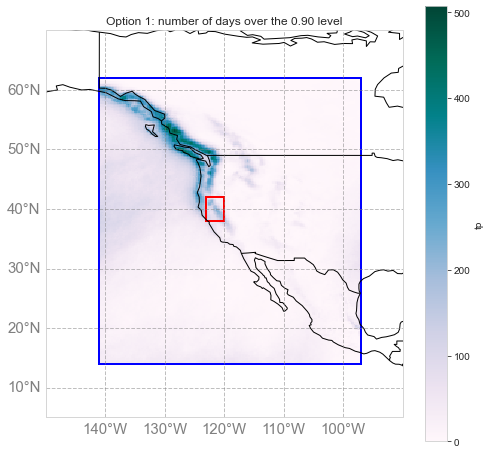

In [5]:
quantile = 0.90

# read y
path = 'data/'
ds_target = xr.open_dataset(path + 'era5_daily_target_precip_NCA.nc')

# compute level for all years in the test set
y = ds_target.sel(time=slice('2011-01-01', '2019-12-31'))
y = y.tp.values.astype(float) # precip values shape=(time,)=（12783,）
y = y[~np.isnan(y)] # removed nan from y so that shape=(5293,)
level = np.quantile(y, quantile)
    
    
# map
geo = ccrs.PlateCarree() # define origin coordinate frame
# ax = plt.subplot(1,2,1, projection=geo)
ax = plt.subplot(projection=geo)

# ax.add_feature(cartopy.feature.LAND, color='0.2')
# ax.add_feature(cartopy.feature.OCEAN, color='steelblue')
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.add_feature(cartopy.feature.COASTLINE, linestyle='-')
ax.set_extent([-150,-90,5,70], crs=geo)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}


gl.top_labels = False
gl.right_labels = False

# outer domain  Area: 62/-141/14/-97
ax.add_patch(mpatches.Rectangle(xy=[-141, 14], width=44, height=48,
                                    edgecolor='blue',
                                    facecolor='none',
                                    linewidth=2,
                                    transform=ccrs.PlateCarree()))

ax.add_patch(mpatches.Rectangle(xy=[-123, 38], width=3, height=4,
                                    edgecolor='red',
                                    facecolor='none',
                                    linewidth=2,
                                    transform=ccrs.PlateCarree()))

# add precip
year = '2011'
path = 'data/era/'
ds_era = xr.open_dataset(path + 'era5_daily_target_precip_NCA_%s.nc' % year)
ds_era = ds_era.tp*100
ds_test = ds_era.sel(time=is_ndjfm(ds_era['time.month']))

years = ['2012','2013','2014','2015','2016','2017','2018']

for year in years:
    path = 'data/era/'
    ds_era = xr.open_dataset(path + 'era5_daily_target_precip_NCA_%s.nc' % year)
    ds_era = ds_era.tp*100
    ds = ds_era.sel(time=is_ndjfm(ds_era['time.month']))
    ds_test = xr.concat([ds_test, ds], dim='time') 

# ds.mean('time').plot.contourf(ax=ax, transform=geo, vmin=0, vmax=5, cmap='PuBuGn', add_colorbar = False)
(ds_test>level).sum('time').plot(ax=ax, transform=geo, cmap='PuBuGn', add_colorbar = True)
plt.title('Option 1: number of days over the 0.90 level')
plt.show()

### Final Figure 1 quantile 0.90 4inch * 4 inch

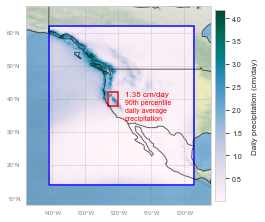

In [13]:
train_color = 'C7' #sns.xkcd_palette(['denim blue'])
test_color = 'C0'#sns.xkcd_palette(['medium green'])

plt.rcParams['figure.figsize'] = [4, 4]
# map
geo = ccrs.PlateCarree() # define origin coordinate frame
# ax = plt.subplot(1,2,1, projection=geo)
ax = plt.subplot(projection=geo)

ax.stock_img()


# ax.add_feature(cartopy.feature.LAND, color='0.2')
# ax.add_feature(cartopy.feature.OCEAN, color='steelblue')
ax.add_feature(cartopy.feature.BORDERS, linestyle='-',alpha = 0.6)
ax.add_feature(cartopy.feature.COASTLINE, linestyle='-',alpha = 0.6)
ax.set_extent([-148,-92,8,68], crs=geo)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 6, 'color': 'gray'}
gl.ylabel_style = {'size': 6, 'color': 'gray'}


gl.top_labels = False
gl.right_labels = False

# outer domain  Area: 62/-141/14/-97
ax.add_patch(mpatches.Rectangle(xy=[-141, 14], width=44, height=48,
                                    edgecolor='blue',
                                    facecolor='none',
                                    linewidth=1.5,
                                    transform=ccrs.PlateCarree()))

ax.add_patch(mpatches.Rectangle(xy=[-123, 38], width=3, height=4,
                                    edgecolor='red',
                                    facecolor='none',
                                    linewidth=1.5,
                                    transform=ccrs.PlateCarree()))

# add precip
year = '2011'
path = 'data/era/'
ds_era = xr.open_dataset(path + 'era5_daily_target_precip_NCA_%s.nc' % year)
ds_era = ds_era.tp*100
ds_test = ds_era.sel(time=is_ndjfm(ds_era['time.month']))

years = ['2012','2013','2014','2015','2016','2017','2018']

for year in years:
    path = 'data/era/'
    ds_era = xr.open_dataset(path + 'era5_daily_target_precip_NCA_%s.nc' % year)
    ds_era = ds_era.tp*100
    ds = ds_era.sel(time=is_ndjfm(ds_era['time.month']))
    ds_test = xr.concat([ds_test, ds], dim='time') 

# ds.mean('time').plot.contourf(ax=ax, transform=geo, vmin=0, vmax=5, cmap='PuBuGn', add_colorbar = False)
ds_test_plot = ds_test.quantile(0.90, dim='time').plot(ax=ax, transform=geo, cmap='PuBuGn', 
                                        add_colorbar = False,
                                        add_labels= False
#                                         ,
#                                         cbar_kwargs=dict(#orientation='horizontal',
#                                         pad=0.03, 
#                                         shrink=0.88, 
#                                         label='Daily precipitation (cm/day)')
                                        )

# plt.title('Extent of research area overlaying on daily average precipitation level \nfor the 90th percentile heavy rainfall event from 2011 to 2019', 
#           fontsize = 12)
cbar = plt.colorbar(ds_test_plot, pad=0.02, shrink=0.88)
cbar.set_label('Daily precipitation (cm/day)', fontsize=8, labelpad=10)
cbar.ax.tick_params(labelsize=7)
cbar.ax.tick_params(labelsize=7)

# cbar.ax.cbar_kwargs=dict(#orientation='horizontal',
#                                         pad=0.03, 
#                                         shrink=0.88, 
#                                         label='Daily precipitation (cm/day)')

#显示colorbar
#     cbar.set_label('$T_B(K)$',fontdict=font)
#     cbar.set_ticks(np.linspace(160,300,8))
#     cbar.set_ticklabels( ('160', '180', '200', '220', '240',  '260',  '280',  '300'))

plt.annotate('1.38 cm/day', xy=(-118,41), color='red', fontsize=8)
plt.annotate('90th percentile', xy=(-118,38.5), color='red', fontsize=7)
plt.annotate('daily average', xy=(-118,36), color='red', fontsize=7) 
plt.annotate('precipitation', xy=(-118,33.5), color='red', fontsize=7)

ax.figure.savefig('/final_figures/1.svg', format='svg', bbox_inches='tight')
ax.figure.savefig('/final_figures/1.png', dpi=300, bbox_inches='tight')
plt.show()

#Extent of research area overlaying on daily average precipitation level for the 90th percentile heavy rainfall event from 2011 to 2019

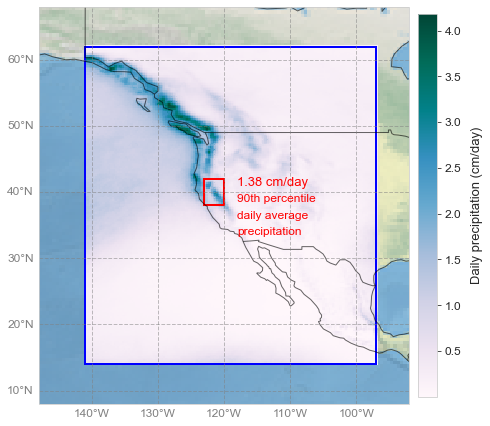

In [6]:
train_color = 'C7' #sns.xkcd_palette(['denim blue'])
test_color = 'C0'#sns.xkcd_palette(['medium green'])

plt.rcParams['figure.figsize'] = [8, 8]
# map
geo = ccrs.PlateCarree() # define origin coordinate frame
# ax = plt.subplot(1,2,1, projection=geo)
ax = plt.subplot(projection=geo)

ax.stock_img()


# ax.add_feature(cartopy.feature.LAND, color='0.2')
# ax.add_feature(cartopy.feature.OCEAN, color='steelblue')
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha = 0.6)
ax.add_feature(cartopy.feature.COASTLINE, linestyle='-', alpha = 0.6)
ax.set_extent([-148,-92,8,68], crs=geo)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}


gl.top_labels = False
gl.right_labels = False

# outer domain  Area: 62/-141/14/-97
ax.add_patch(mpatches.Rectangle(xy=[-141, 14], width=44, height=48,
                                    edgecolor='blue',
                                    facecolor='none',
                                    linewidth=2,
                                    transform=ccrs.PlateCarree()))

ax.add_patch(mpatches.Rectangle(xy=[-123, 38], width=3, height=4,
                                    edgecolor='red',
                                    facecolor='none',
                                    linewidth=2,
                                    transform=ccrs.PlateCarree()))

# add precip
year = '2011'
path = 'data/era/'
ds_era = xr.open_dataset(path + 'era5_daily_target_precip_NCA_%s.nc' % year)
ds_era = ds_era.tp*100
ds_test = ds_era.sel(time=is_ndjfm(ds_era['time.month']))

years = ['2012','2013','2014','2015','2016','2017','2018']

for year in years:
    path = 'data/era/'
    ds_era = xr.open_dataset(path + 'era5_daily_target_precip_NCA_%s.nc' % year)
    ds_era = ds_era.tp*100
    ds = ds_era.sel(time=is_ndjfm(ds_era['time.month']))
    ds_test = xr.concat([ds_test, ds], dim='time') 

# ds.mean('time').plot.contourf(ax=ax, transform=geo, vmin=0, vmax=5, cmap='PuBuGn', add_colorbar = False)
ds_test_plot = ds_test.quantile(0.90, dim='time').plot(ax=ax, transform=geo, cmap='PuBuGn', 
                                        add_colorbar = False,
                                        add_labels= False
#                                         ,
#                                         cbar_kwargs=dict(#orientation='horizontal',
#                                         pad=0.03, 
#                                         shrink=0.88, 
#                                         label='Daily precipitation (cm/day)')
                                        )

# plt.title('Extent of research area overlaying on daily average precipitation level \nfor the 90th percentile heavy rainfall event from 2011 to 2019', 
#           fontsize = 12)
cbar = plt.colorbar(ds_test_plot, pad=0.02, shrink=0.88)
cbar.set_label('Daily precipitation (cm/day)', fontsize=13, labelpad=10)
cbar.ax.tick_params(labelsize=12)
cbar.ax.tick_params(labelsize=12)

# cbar.ax.cbar_kwargs=dict(#orientation='horizontal',
#                                         pad=0.03, 
#                                         shrink=0.88, 
#                                         label='Daily precipitation (cm/day)')

#显示colorbar
#     cbar.set_label('$T_B(K)$',fontdict=font)
#     cbar.set_ticks(np.linspace(160,300,8))
#     cbar.set_ticklabels( ('160', '180', '200', '220', '240',  '260',  '280',  '300'))

plt.annotate('1.38 cm/day', xy=(-118,41), color='red', fontsize=13)
plt.annotate('90th percentile', xy=(-118,38.5), color='red', fontsize=12)
plt.annotate('daily average', xy=(-118,36), color='red', fontsize=12) 
plt.annotate('precipitation', xy=(-118,33.5), color='red', fontsize=12)

ax.figure.savefig('/final_figures/1.svg', format='svg', bbox_inches='tight')
ax.figure.savefig('/final_figures/1.png', dpi=300, bbox_inches='tight')
plt.show()

#Extent of research area overlaying on daily average precipitation level for the 90th percentile heavy rainfall event from 2011 to 2019